In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Predict PV power (Active Power) based on weather data

In [2]:
#Datareading
#LIMIT = 100
LIMIT = None
weather_data = pd.read_csv('101-Site_DKA-WeatherStation.csv', engine='python', encoding="ISO-8859-1",b
                                  parse_dates=['timestamp'], index_col=['timestamp'],nrows=LIMIT)

In [5]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1048575 entries, 2008-12-09 05:55:00 to 2018-09-26 12:15:00
Data columns (total 9 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   Wind_Speed                    841771 non-null   float64
 1   Weather_Temperature_Celsius   1047948 non-null  float64
 2   Weather_Relative_Humidity     1047948 non-null  float64
 3   Global_Horizontal_Radiation   1047948 non-null  float64
 4   Diffuse_Horizontal_Radiation  1047948 non-null  float64
 5   Wind_Direction                1045787 non-null  float64
 6   Weather_Daily_Rainfall        1047967 non-null  float64
 7   Radiation_Global_Tilted       500972 non-null   float64
 8   Radiation_Diffuse_Tilted      543099 non-null   float64
dtypes: float64(9)
memory usage: 80.0 MB


In [4]:
weather_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Wind_Speed,841771.0,2.508527,4.362972,-1.742131e+03,1.157686,2.251974,3.586417,54.389500
Weather_Temperature_Celsius,1047948.0,21.144343,9.629623,-3.998763e+01,14.551287,21.647482,28.203893,51.261726
Weather_Relative_Humidity,1047948.0,39.800829,24.715014,0.000000e+00,19.943620,33.012621,56.260888,102.896820
Global_Horizontal_Radiation,1047948.0,257.624377,354.752392,-9.856900e+02,3.326437,8.335482,508.183243,2725.605957
Diffuse_Horizontal_Radiation,1047948.0,55.163553,91.259754,0.000000e+00,1.202074,5.937956,73.328865,2134.985107
Wind_Direction,1045787.0,21.182669,3716.376762,-9.999991e+04,99.062798,147.000000,239.995308,30152.339840
Weather_Daily_Rainfall,1047967.0,0.376306,2.693506,0.000000e+00,0.000000,0.000000,0.000000,67.199997
Radiation_Global_Tilted,500972.0,277.041893,380.455914,4.670000e-43,2.638995,8.409935,557.449585,1553.391113
Radiation_Diffuse_Tilted,543099.0,49.932778,245.180992,-1.919657e-02,1.404235,2.892333,70.354206,97322.585940


In [6]:
weather_data.columns

Index(['Wind_Speed', 'Weather_Temperature_Celsius',
       'Weather_Relative_Humidity', 'Global_Horizontal_Radiation',
       'Diffuse_Horizontal_Radiation', 'Wind_Direction',
       'Weather_Daily_Rainfall', 'Radiation_Global_Tilted',
       'Radiation_Diffuse_Tilted'],
      dtype='object')

In [22]:
weather_data.shape

(1048575, 9)

In [18]:
weather_data.tail()

,Wind_Speed,Weather_Temperature_Celsius,Weather_Relative_Humidity,Global_Horizontal_Radiation,Diffuse_Horizontal_Radiation,Wind_Direction,Weather_Daily_Rainfall,Radiation_Global_Tilted,Radiation_Diffuse_Tilted
timestamp,,,,,,,,,
2018-09-26 11:55:00,NaN,27.999962,10.145400,1089.497803,106.742630,29.817230,0.0,1160.387817,100.968041
2018-09-26 12:00:00,NaN,28.427448,9.907348,1092.054688,104.849342,29.701479,0.0,1166.877930,99.751610
2018-09-26 12:05:00,NaN,28.141226,10.053848,1098.977539,107.366463,29.691515,0.0,1171.070190,97.454041
2018-09-26 12:10:00,NaN,28.631046,9.615940,1099.987061,105.021545,29.630993,0.0,1177.123169,98.706070
2018-09-26 12:15:00,NaN,28.163515,9.758543,1107.867188,111.967743,29.668180,0.0,1180.499146,100.589127


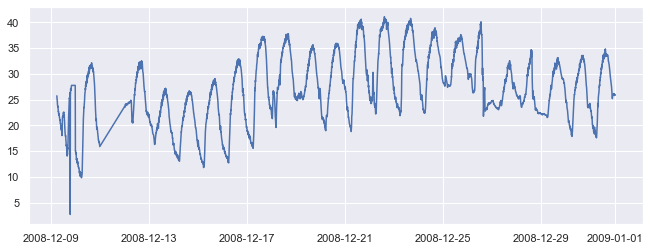

In [15]:
# plot weather data

dates='2008-12'      # yyyy-mm-dd
colums='Weather_Temperature_Celsius'

sns.set(rc={'figure.figsize':(11, 4)})
plt.plot(weather_data.loc[dates,colums])


In [16]:

PV_data = pd.read_csv('71-Site_18-SunPower.csv', engine='python', encoding="ISO-8859-1",
                                  parse_dates=['timestamp'], index_col=['timestamp'],nrows=LIMIT)

In [17]:
PV_data.info() 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 782116 entries, 2013-07-22 00:00:00 to 2021-06-01 17:10:00
Data columns (total 4 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Active_Energy_Delivered_Received  782114 non-null  float64
 1   Current_Phase_Average             782113 non-null  float64
 2   Active_Power                      782113 non-null  float64
 3   Performance_Ratio                 587350 non-null  float64
dtypes: float64(4)
memory usage: 29.8 MB


In [19]:
PV_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Active_Energy_Delivered_Received,782114.0,65208.439299,23468.792844,24734.000000,44999.0,64897.000000,85463.000000,106215.000000
Current_Phase_Average,782113.0,5.329685,6.740518,0.000000,0.3,0.324333,10.922667,24.566666
Active_Power,782113.0,1.246813,1.688274,-0.004167,0.0,0.000000,2.658366,5.995067
Performance_Ratio,587350.0,209.937668,2152.667464,-10.909832,0.0,0.000000,82.639267,52036.359380


In [23]:
PV_data.shape

(782116, 4)

In [20]:
PV_data.head()

,Active_Energy_Delivered_Received,Current_Phase_Average,Active_Power,Performance_Ratio
timestamp,,,,
2013-07-22 00:00:00,24734.0,0.300667,0.0,NaN
2013-07-22 00:05:00,24734.0,0.301333,0.0,NaN
2013-07-22 00:10:00,24734.0,0.302333,0.0,NaN
2013-07-22 00:15:00,24734.0,0.301333,0.0,NaN
2013-07-22 00:20:00,24734.0,0.304667,0.0,NaN


In [21]:
PV_data.index

DatetimeIndex(['2013-07-22 00:00:00', '2013-07-22 00:05:00',
               '2013-07-22 00:10:00', '2013-07-22 00:15:00',
               '2013-07-22 00:20:00', '2013-07-22 00:25:00',
               '2013-07-22 00:30:00', '2013-07-22 00:35:00',
               '2013-07-22 00:40:00', '2013-07-22 00:45:00',
               ...
               '2021-06-01 16:25:00', '2021-06-01 16:30:00',
               '2021-06-01 16:35:00', '2021-06-01 16:40:00',
               '2021-06-01 16:45:00', '2021-06-01 16:50:00',
               '2021-06-01 16:55:00', '2021-06-01 17:00:00',
               '2021-06-01 17:05:00', '2021-06-01 17:10:00'],
              dtype='datetime64[ns]', name='timestamp', length=782116, freq=None)

Text(0.5, 0, 'Time')

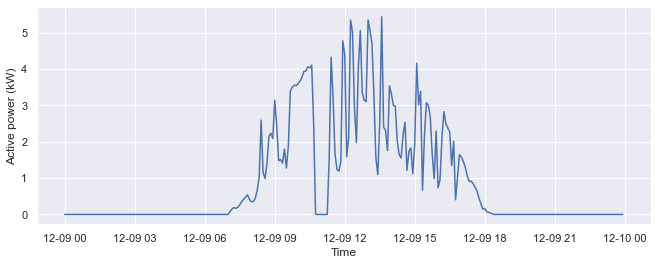

In [31]:
dates='2013-12-09'      # yyyy-mm-dd
colums='Active_Power'

sns.set(rc={'figure.figsize':(11, 4)})

plt.plot(PV_data.loc[dates,colums])
plt.ylabel('Active power (kW)')
plt.xlabel('Time')